# Problem Analysis Workshop 1
* Group Name: Group 7
* Team members: : 
    * Tilvan Madalina: 9058215
    * Wesley Jayavanti: 9019852
    * Yun-Chen Wang: 9040873

In [9]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## 1. Identify a Problem:

## 2.  Install and configure the programming environment on your laptop.

In [10]:
folder = "../Dataset/"
dataname = "The final data set (uncentered and unscaled variables).csv"
path = folder+dataname
table = pd.read_csv(path, index_col=0, na_values=':')
table.head() # prints the first 5 rows of the dataset

,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
Visitors_country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,3.0,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,NaN,...,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,NaN,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,4.0,...,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,3.0,...,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for missing values
print(table.isnull().sum())

Destination_country_name        0
Hotel_id                        0
Reviewer_id                     0
Review_id                       0
Destination_country_id          0
                            ...  
Visitors_country_idv        24428
Visitors_country_mas        24428
Visitors_country_uai        24428
Visitors_country_lto        29408
Visitors_country_ivr        46917
Length: 79, dtype: int64


In [11]:
selected_columns = [
                    'Destination_country_name',
                    'Reviewer_id',
                    'Destination_country_id',
                    'Overall_rating',  
                    'Destination_country_GDP', 
                    'Destination_country_pdi', 
                    'Destination_country_idv', 
                    'Destination_country_mas', 
                    'Destination_country_uai',
                    'Destination_country_lto',
                    'Destination_country_ivr'
                    ] # [1048575 rows x 11 columns]

sub_table = table[selected_columns]
print("type of sub_table", type(sub_table))
# print("sub_table: \n", sub_table) 
print(sub_table.head())

type of sub_table <class 'pandas.core.frame.DataFrame'>
                      Destination_country_name  \
Visitors_country_name                            
Afghanistan                              Egypt   
Afghanistan                              Japan   
Afghanistan                              Egypt   
Afghanistan                     United Kingdom   
Afghanistan                            Croatia   

                                            Reviewer_id  \
Visitors_country_name                                     
Afghanistan            BEFE48CEC37A8BAC68FC5471B7D52A68   
Afghanistan            390FEEFF2C67C9ACC376C133F3E5AD9D   
Afghanistan            452C85191D400F6C83F249B4990CBD74   
Afghanistan            B112C906DAA206F9F2EA9613526DCD3A   
Afghanistan            17552C71896B64C6EFCC959E1551F412   

                       Destination_country_id  Overall_rating  \
Visitors_country_name                                           
Afghanistan                                59    

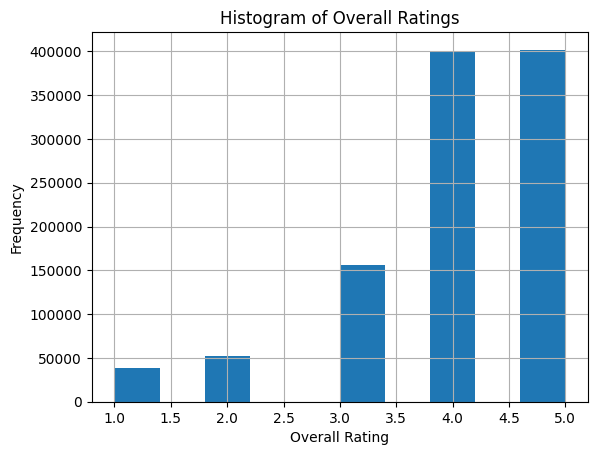

In [6]:
import matplotlib.pyplot as plt

# Example: Histogram for 'Overall_rating'
sub_table['Overall_rating'].hist()
plt.title('Histogram of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Calculate the mean, median, and mode of Overall_rating
mean_value = table['Overall_rating'].mean()
median_value = table['Overall_rating'].median()
mode_value = table['Overall_rating'].mode()[0]  # Use [0] to get the first mode in case of multiple modes

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Calculate variance and standard deviation
variance = table['Overall_rating'].var()
std_dev = table['Overall_rating'].std()

# Calculate quartiles (including the four quartiles)
quartiles = table['Overall_rating'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

# Print the results
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print("Quartiles:")
print(quartiles)


Mean: 4.025749231099349
Median: 4.0
Mode: 5
Variance: 1.0581826087241504
Standard Deviation: 1.0286800322375032
Quartiles:
0.00    1.0
0.25    4.0
0.50    4.0
0.75    5.0
1.00    5.0
Name: Overall_rating, dtype: float64


In [8]:
overall_rating.index

NameError: name 'overall_rating' is not defined

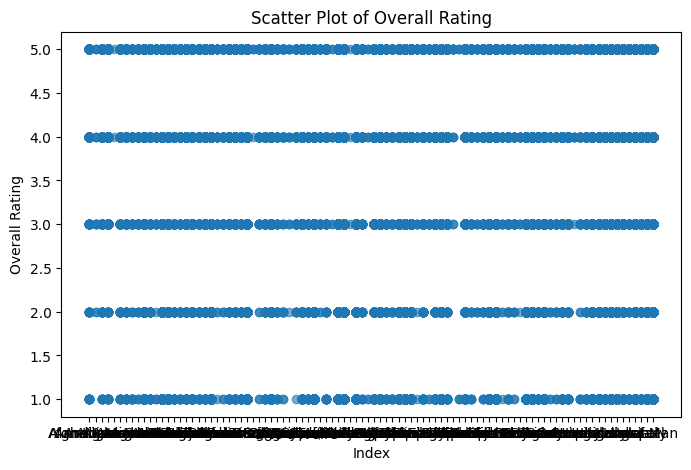

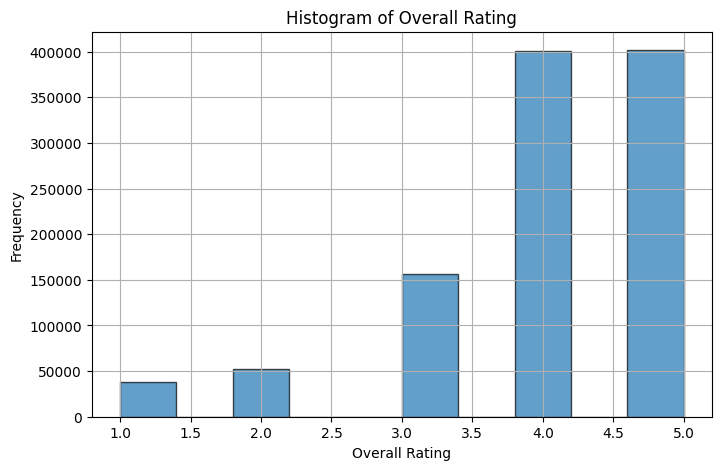

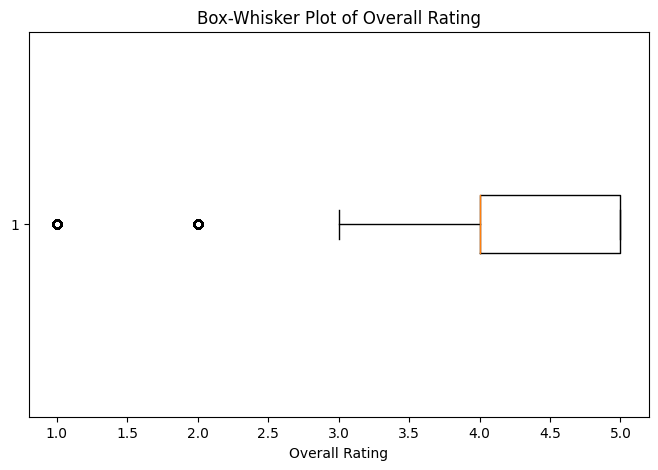

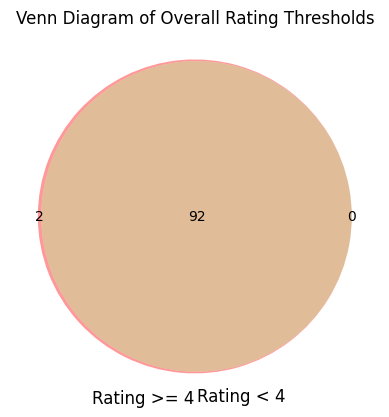

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the dataset
# file_path = 'path_to_your_csv_file.csv'  # Replace with the correct path
# data = pd.read_csv(file_path, index_col=0, na_values=':')

# Extract the Overall_rating column
overall_rating = sub_table['Overall_rating'].dropna()

# Scatter Plot (Overall Rating vs Index)
plt.figure(figsize=(8, 5))
plt.scatter(overall_rating.index, overall_rating, alpha=0.6)
plt.title('Scatter Plot of Overall Rating')
plt.xlabel('Index')
plt.ylabel('Overall Rating')
plt.show()

# Histogram
plt.figure(figsize=(8, 5))
overall_rating.hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

# Box-Whisker Plot
plt.figure(figsize=(8, 5))
plt.boxplot(overall_rating, vert=False)
plt.title('Box-Whisker Plot of Overall Rating')
plt.xlabel('Overall Rating')
plt.show()

# Venn Diagram (Example with Thresholds)
# Split into two groups: Ratings >= 4 and Ratings < 4
group1 = set(overall_rating[overall_rating >= 4].index)
group2 = set(overall_rating[overall_rating < 4].index)
venn2(subsets=(len(group1 - group2), len(group2 - group1), len(group1 & group2)), 
      set_labels=('Rating >= 4', 'Rating < 4'))
plt.title('Venn Diagram of Overall Rating Thresholds')
plt.show()
